# Logistic regression

* The equation for logistic regression is given by:
  $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
                  </br>where</br>
  $$ z = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + .... + \theta_{n}x_{n}$$
  </br> or </br>
  $$ z = \theta_{0} + X^{T}.W$$

* The cost function for logistic regression is given by:
  $$ \hat{y} = \frac{1}{n} \Sigma_{ i = 1 }^{n} [\ y_{i}.log(1 - \hat{y}_{i}) \ - \ (1 - y_{i}).log(1 - \hat{y}_{i})]$$


* The gradient descent formula for logistic regression is given by:
  * $$ \theta_{0} \leftarrow \theta_{0} - \alpha \nabla\theta_{0}$$
    </br>where</br>
    $$\nabla\theta_{0} = \frac{1}{n} \Sigma_{i = 1}^{n} (y_{i} - \hat{y}_{i})$$
  
  * $$ \theta_{1} \leftarrow \theta_{1} - \alpha \nabla\theta_{1}$$
    </br>where</br>
    $$
    \nabla\theta_{1} = \frac{1}{n} \Sigma_{i = 1}^{n} [(y_{i} - \hat{y}_{i})x_i]$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class LogisticRegression:
  def __init__(self, learning_rate: float = 0.01, num_iterations: int = 1000):  ## Constructor for the class.
    self.learning_rate  = learning_rate                                         ## Setting the learning rate.
    self.num_iterations = num_iterations                                        ## Setting the number of training iterations.
    self.X              = None                                                  ## Initialising the features array.
    self.y              = None                                                  ## Initialising the target array.
    self.weights        = None                                                  ## Initialising the weights array.
    self.bias           = None                                                  ## Initialising the bias.
    self.N              = None                                                  ## Initialising the number of sample.
    self.D              = None                                                  ## Initialsing
    self.training_costs = list()                                                ## Creating an array to store the training cost values.


  def fit(self, X, y):                                                          ## Method to train the model
    self.X         = X                                                          ## Setting the features array.
    self.y         = y                                                          ## Setting the target array.
    self.N, self.D = self.X.shape                                               ## Setting the number of samples and number of features.
    self.weights   = np.zeros(self.D)                                           ## Setting the weights as an array of zeros.
    self.bias      = 0                                                          ## Setting the bias as 0.

    print("======= Beginning model training =======")
    for i in range(self.num_iterations):
      self.update_weights()
      loss = self.compute_loss()
      self.training_costs.append(loss)
      if i % 100 == 0:
        print(f'--- Iteration: {i}, Cost: {loss} ---');
    print(f'--- Iteration: {i}, Cost: {loss} ---');
    print('======= Training completed =======')

  def _get_sigmoid(self, z):                                                    ## Method to get the sigmoid for the given array
     sigmoid = 1 / (1 + np.exp(-z))
     return sigmoid

  def _predict_probability(self, X):                                            ## Method to get to predict the probablity
    z = np.dot(X, self.weights) + self.bias
    return self._get_sigmoid(z)

  def predict(self, X, threshold: float = 0.5):                                 ## Method to predict the outcome.
    y = self._predict_probability(X) >= threshold
    return y.astype(int)

  def compute_loss(self):                                                       ## Method to calculate the binary cross-entropy loss.
    y_pred = self._predict_probability(self.X)
    loss = -(1 / self.N) * (np.dot(self.y, np.log(y_pred + 1e-15)) + np.dot(1 - self.y, np.log(1 - y_pred + 1e-15)))
    return loss


  def plot_training_loss_progression(self):                                     ## Method to plot the progression of loss over iterations
    plt.style.use("fivethirtyeight")
    sns.lineplot(self.training_costs)
    plt.xlabel("Number of iterations")
    plt.ylabel("Binary cross entropy loss")
    plt.title("Progression of loss over iterations")
    plt.show()

  def update_weights(self):                                                     ## Function to perform gradient descent.
    y_pred        = self._predict_probability(self.X)                           ## Predicting the values with the current weights and bias.
    dw            = (1 / self.N) * np.dot(self.X.T, (y_pred - self.y))          ## Computing the gradient for weights.
    db            = (1 / self.N) * np.sum(y_pred - self.y)                      ## Computing the gradient for bias.
    self.weights -= self.learning_rate * dw                                     ## Updating the weights.
    self.bias    -= self.learning_rate * db                                     ## Updating the bias.

======= Beginning model training =======
--- Iteration: 0, Cost: 0.6911822284020389 ---
--- Iteration: 100, Cost: 0.5369648130094941 ---
--- Iteration: 200, Cost: 0.44055977390513834 ---
--- Iteration: 300, Cost: 0.37654995582549106 ---
--- Iteration: 400, Cost: 0.3315148062091604 ---
--- Iteration: 499, Cost: 0.2985613988698941 ---
======= Training completed =======


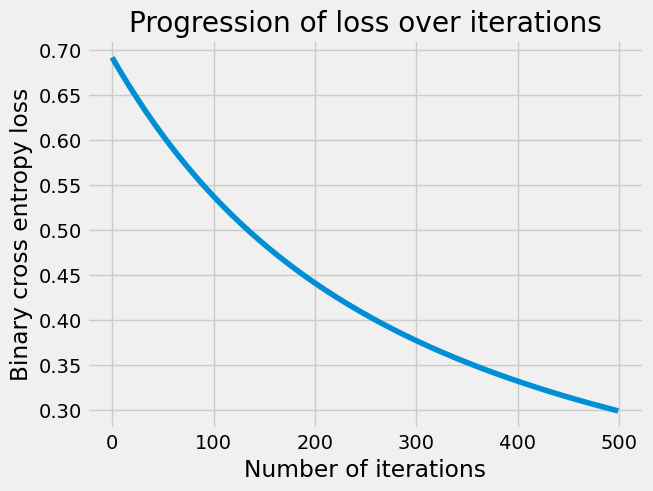

Model weights are: [ 1.350355   -0.03054381]
Model bias is: 0.002612052244525058


In [3]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
X, y   = make_classification(n_samples=200, n_features=2, n_informative=2, n_clusters_per_class=1, n_redundant=0,flip_y=0.01, class_sep=2.0, random_state=42)
scaler = StandardScaler()
X      = scaler.fit_transform(X)
model = LogisticRegression(0.01, 500)
model.fit(X, y)
model.plot_training_loss_progression()
print(f"Model weights are: {model.weights}")
print(f"Model bias is: {model.bias}")